Title: German Credit data

Student ID: s3681410

Student Name and email (contact info): Le Ba Hoang An, s3681410@rmit.edu.vn

Affiliations: RMIT University Vietnam.

Date of Report:

I certify that this is all my own original work. If I took any parts from elsewhere, then they were non-essential parts of the assignment, and they are clearly attributed in my submission.  I will show I agree to this honor code by typing "Yes": Yes.



# Table of Contents

1. [Abstract/Executive Summary](#abstractexecutive-summary)
2. [Introduction](#introduction)
3. [Methodology](#methodology)
4. [Results](###results)
5. [Discussion](#discussion)
6. [Conclusion](#conclusion)
7. [References](#references)

# Abstract/Executive Summary

This project focuses on credit risk assessment using a dataset that includes various financial and personal attributes of individuals applying for credit. The dataset encompasses information such as the status of existing checking accounts, credit history, purpose of the loan, credit amount, savings, employment history, personal details, and other relevant factors.

The goal of the project is to develop a predictive model that can effectively evaluate an individual's creditworthiness, distinguishing between "Good" and "Bad" credit outcomes. The provided dataset consists of both positive and negative credit instances, categorized as "Good" and "Bad" based on historical repayment behavior.

Key features such as credit history, duration of the loan, savings, and employment status are crucial factors in determining credit risk. The dataset also includes demographic information like age, gender, and marital status, which may further contribute to the predictive power of the model.

The project involves exploratory data analysis (EDA) to understand the distribution and relationships among variables. Feature engineering may be applied to enhance the model's ability to discern patterns in the data. Machine learning algorithms, such as classification models, will be employed to train and evaluate the predictive performance of the model.

The outcome of this project will provide financial institutions with a valuable tool for automating the credit evaluation process, helping them make more informed and efficient lending decisions. The model's accuracy and robustness will be assessed through rigorous testing, and the results will be presented in a comprehensive report, offering insights into the key factors influencing credit risk in the given context.

# Introduction

The goal of this project is to develop a predictive model that can accurately assess and classify the creditworthiness of individuals based on various features present in the provided dataset. The model should be capable of making binary predictions, categorizing individuals as either "Good" or "Bad" credit risks. This predictive model can aid financial institutions in automating the credit approval process, helping them make informed decisions about whether to approve or deny credit applications. The project aims to achieve a high level of accuracy, precision, and recall in predicting creditworthiness, thereby enhancing the efficiency and reliability of the credit evaluation process.

# Methodology

We will perform these following steps below

### Task 1: Data Preparation and Goal Statement

In [1700]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

In [1701]:
df = pd.read_csv('data/german.data', delim_whitespace=True)

df.columns = ['Status of existing checking account', 
            'Duration in month', 
            'Credit history', 
            'Purpose', 
            'Credit amount', 
            'Savings account/bonds', 
            'Present employment since', 
            'Installment rate in percentage of disposable income',
            'Personal status and sex', 
            'Other debtors / guarantors',
            'Present residence since',
            'Property', 
            'Age in years', 
            'Other installment plans', 
            'Housing', 
            'Number of existing credits at this bank', 
            'Job',
            'Number of people being liable to provide maintenance for',
            'Telephone', 
            'Foreign Worker', 
            'Cost Matrix']

df['Credit history'] = df['Credit history'].replace({
    'A30': 'no credits taken/ all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/ other credits existing (not at this bank)'
})

df['Purpose'] = df['Purpose'].replace({
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': '(vacation - does not exist?)',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
})

df['Other installment plans'] = df['Other installment plans'].replace({
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
})

df['Housing'] = df['Housing'].replace({
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
})

df['Job'] = df['Job'].replace({
    'A171': 'unemployed/ unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified employee/ officer'
})

df['Property'] = df['Property'].replace({
    'A121': 'real estate',
    'A122': 'if not A121: building society savings agreement/life insurance',
    'A123': 'if not A121/A122: car or other, not in attribute 6',
    'A124': 'unknown / no property'
})

df['Foreign Worker'] = df['Foreign Worker'].replace({
    'A201': 'yes',
    'A202': 'no'
})

df['Other debtors / guarantors'] = df['Other debtors / guarantors'].replace({
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
})

df['Personal status and sex'] = df['Personal status and sex'].replace({
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
})

df['Telephone'] = df['Telephone'].replace({
    'A191': 'none',
    'A192': 'yes, registered under the customer\'s name'
})

df['Present employment since'] = df['Present employment since'].replace({
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= < 4 years',
    'A74': '4 <= < 7 years',
    'A75': '>= 7 years'
})

df['Savings account/bonds'] = df['Savings account/bonds'].replace({
    'A61': '< 100 DM',
    'A62': '100 <= < 500 DM',
    'A63': '500 <= < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/ no savings account'
})

df['Status of existing checking account'] = df['Status of existing checking account'].replace({
    'A11': '< 0 DM',
    'A12': '0 <= < 200 DM',
    'A13': '>= 200 DM / salary assignments for at least 1 year',
    'A14': 'no checking account'
})

df['Cost Matrix'] = df['Cost Matrix'].replace({
    1: 'Good',
    2: 'Bad'
})

In [1702]:
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Cost Matrix
0,0 <= < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= < 4 years,2,female: divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
1,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
2,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= < 7 years,2,male: single,guarantor,...,if not A121: building society savings agreemen...,45,none,for free,1,skilled employee / official,2,none,yes,Good
3,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= < 4 years,3,male: single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad
4,no checking account,36,existing credits paid back duly till now,education,9055,unknown/ no savings account,1 <= < 4 years,2,male: single,none,...,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customer's name",yes,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,< 100 DM,4 <= < 7 years,3,female: divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good
995,< 0 DM,30,existing credits paid back duly till now,car (used),3857,< 100 DM,1 <= < 4 years,4,male: divorced/separated,none,...,if not A121: building society savings agreemen...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customer's name",yes,Good
996,no checking account,12,existing credits paid back duly till now,radio/television,804,< 100 DM,>= 7 years,4,male: single,none,...,"if not A121/A122: car or other, not in attribu...",38,none,own,1,skilled employee / official,1,none,yes,Good
997,< 0 DM,45,existing credits paid back duly till now,radio/television,1845,< 100 DM,1 <= < 4 years,4,male: single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customer's name",yes,Bad


In [1703]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Cost Matrix
0,0 <= < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= < 4 years,2,female: divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
1,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
2,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= < 7 years,2,male: single,guarantor,...,if not A121: building society savings agreemen...,45,none,for free,1,skilled employee / official,2,none,yes,Good
3,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= < 4 years,3,male: single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad
4,no checking account,36,existing credits paid back duly till now,education,9055,unknown/ no savings account,1 <= < 4 years,2,male: single,none,...,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customer's name",yes,Good


In [1704]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [1705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       999 non-null    object
 1   Duration in month                                         999 non-null    int64 
 2   Credit history                                            999 non-null    object
 3   Purpose                                                   999 non-null    object
 4   Credit amount                                             999 non-null    int64 
 5   Savings account/bonds                                     999 non-null    object
 6   Present employment since                                  999 non-null    object
 7   Installment rate in percentage of disposable income       999 non-null    int64 
 8   Personal status and sex       

### Task 2: Data Exploration

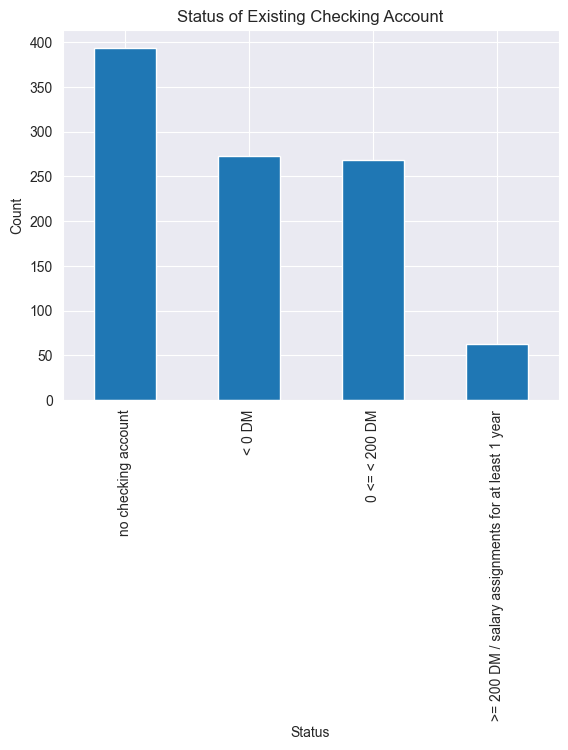

In [1706]:
df['Status of existing checking account'].value_counts().plot(kind='bar')
plt.title('Status of Existing Checking Account')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

The bar chart depicts the status of existing checking accounts, revealing that those without a checking account have the highest frequency, while the category with a salary of at least 200 DM / salary assignments for at least 1 year features the lowest occurrence.

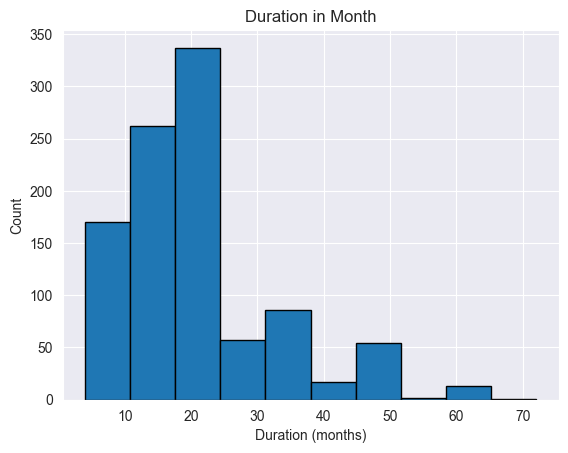

In [1707]:
plt.hist(df['Duration in month'], bins=10, edgecolor='black')
plt.title('Duration in Month')
plt.xlabel('Duration (months)')
plt.ylabel('Count')
plt.show()

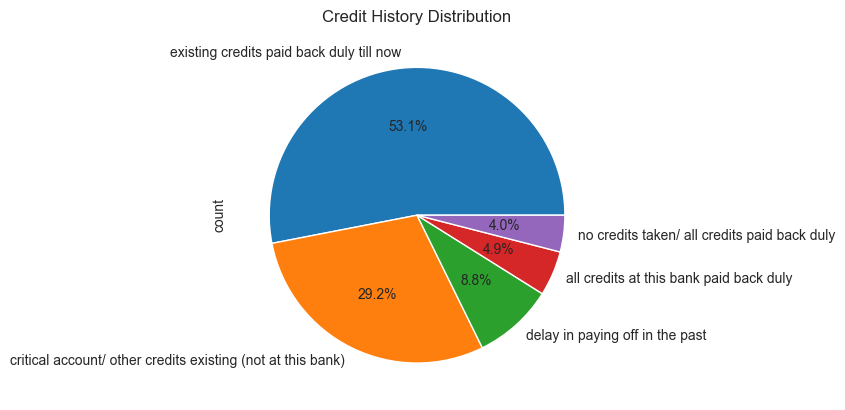

In [1708]:
df['Credit history'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Credit History Distribution')
plt.show()

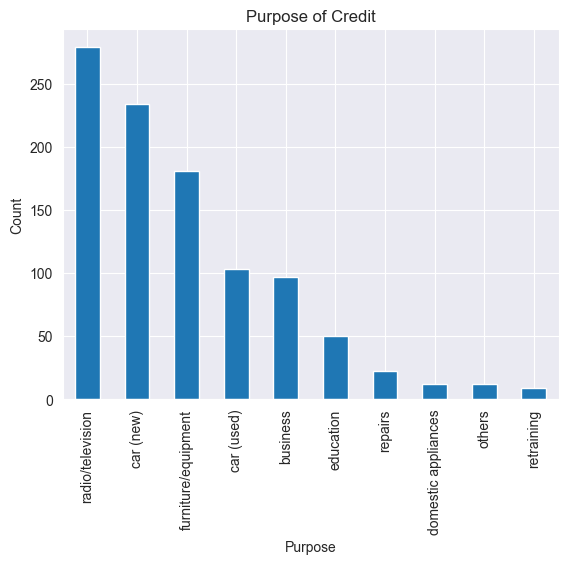

In [1709]:
df['Purpose'].value_counts().plot(kind='bar')
plt.title('Purpose of Credit')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the purpose of credit, highlighting that the highest frequency is observed in the category without radio/television as a reason, whereas retraining represents the least common purpose among the depicted options.

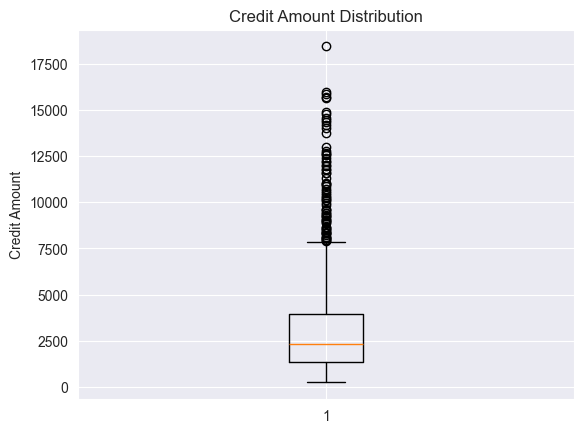

In [1710]:
plt.boxplot(df['Credit amount'])
plt.title('Credit Amount Distribution')
plt.ylabel('Credit Amount')
plt.show()

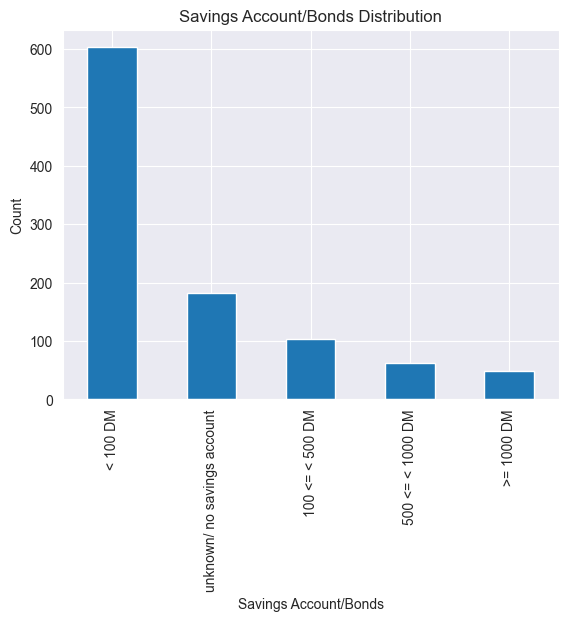

In [1711]:
df['Savings account/bonds'].value_counts().plot(kind='bar')
plt.title('Savings Account/Bonds Distribution')
plt.xlabel('Savings Account/Bonds')
plt.ylabel('Count')
plt.show()

The bar chart showcases savings account and bonds data, indicating that the highest frequency occurs in the category with savings below 100 DM, while the lowest frequency is associated with savings equal to or exceeding 1000 DM.

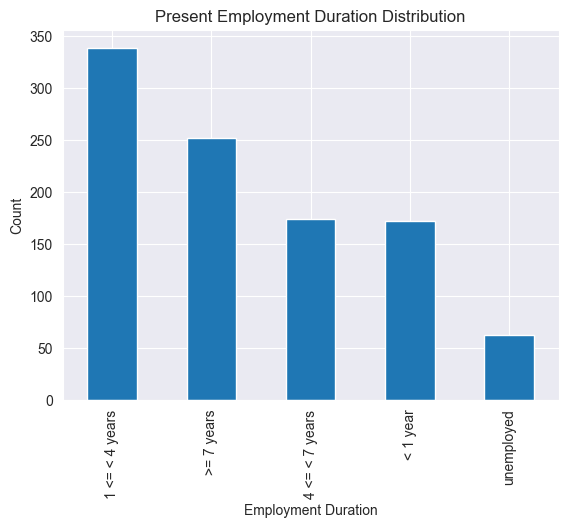

In [1712]:
df['Present employment since'].value_counts().plot(kind='bar')
plt.title('Present Employment Duration Distribution')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.show()

The bar chart visually represents the distribution of present employment durations, with the category of 1 to 4 years exhibiting the highest frequency, while the unemployed category demonstrates the lowest occurrence.

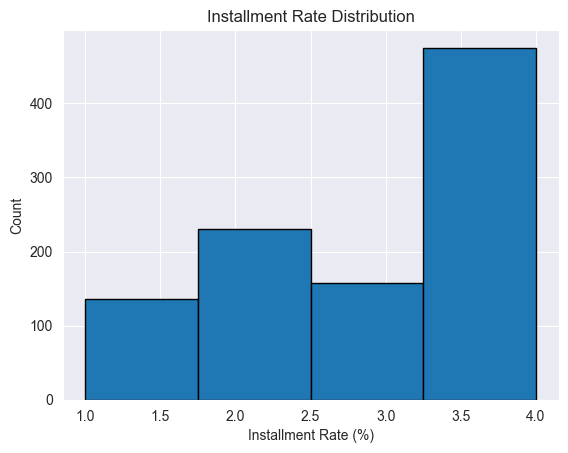

In [1713]:
plt.hist(df['Installment rate in percentage of disposable income'], bins=4, edgecolor='black')
plt.title('Installment Rate Distribution')
plt.xlabel('Installment Rate (%)')
plt.ylabel('Count')
plt.show()

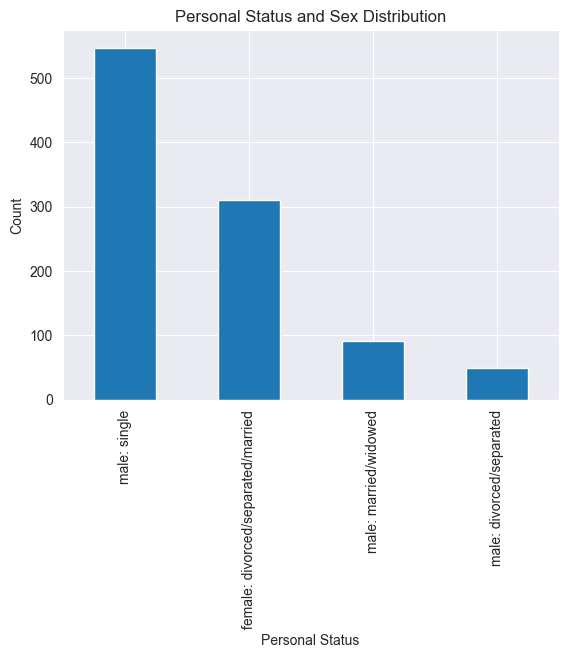

In [1714]:
df['Personal status and sex'].value_counts().plot(kind='bar', stacked=True)
plt.title('Personal Status and Sex Distribution')
plt.xlabel('Personal Status')
plt.ylabel('Count')
plt.show()

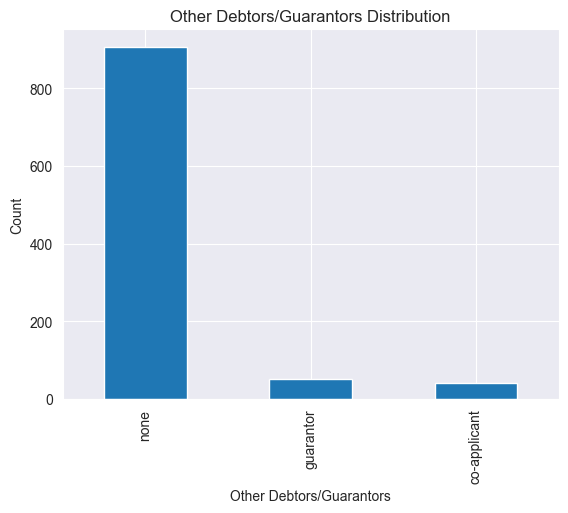

In [1715]:
df['Other debtors / guarantors'].value_counts().plot(kind='bar')
plt.title('Other Debtors/Guarantors Distribution')
plt.xlabel('Other Debtors/Guarantors')
plt.ylabel('Count')
plt.show()

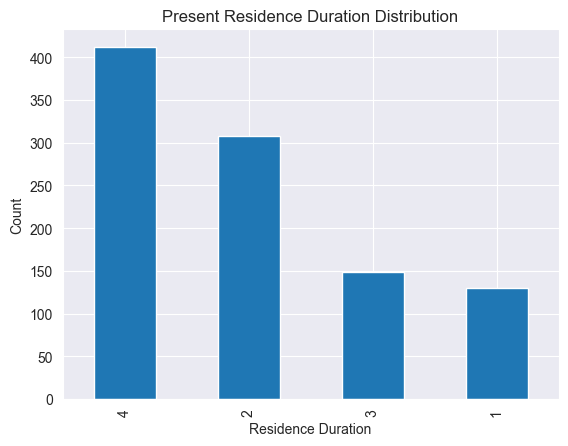

In [1716]:
df['Present residence since'].value_counts().plot(kind='bar')
plt.title('Present Residence Duration Distribution')
plt.xlabel('Residence Duration')
plt.ylabel('Count')
plt.show()

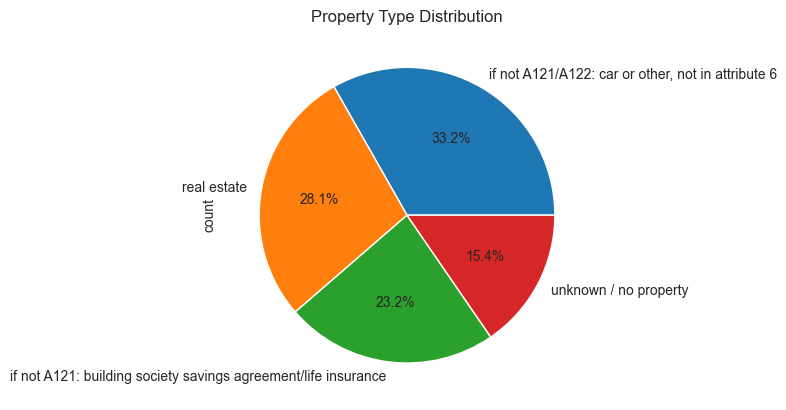

In [1717]:
df['Property'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Property Type Distribution')
plt.show()

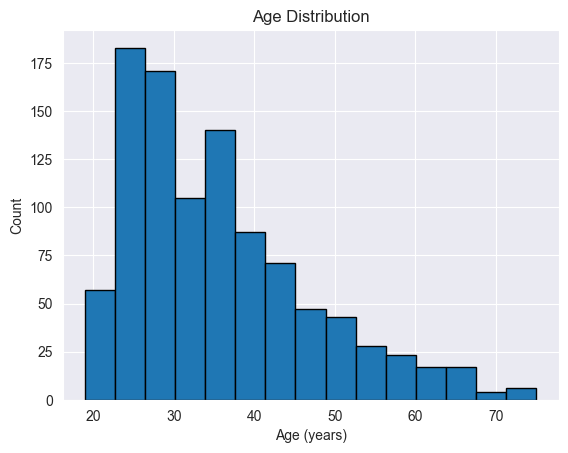

In [1718]:
plt.hist(df['Age in years'], bins=15, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

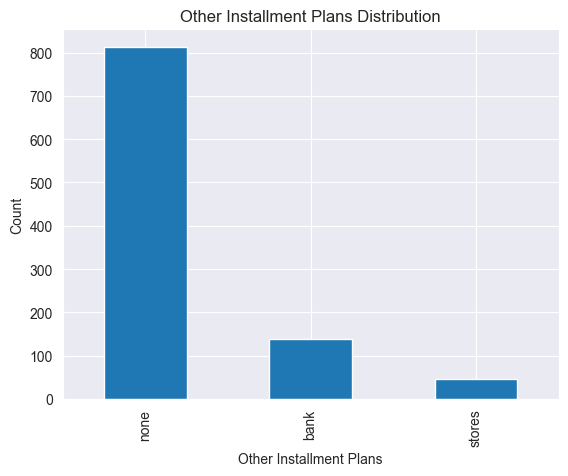

In [1719]:
df['Other installment plans'].value_counts().plot(kind='bar')
plt.title('Other Installment Plans Distribution')
plt.xlabel('Other Installment Plans')
plt.ylabel('Count')
plt.show()

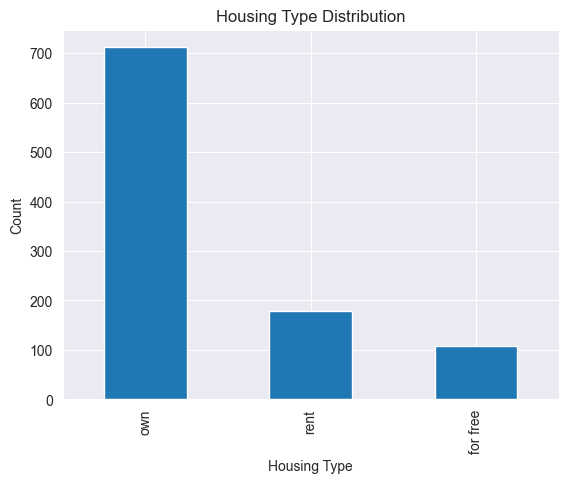

In [1720]:
df['Housing'].value_counts().plot(kind='bar')
plt.title('Housing Type Distribution')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.show()

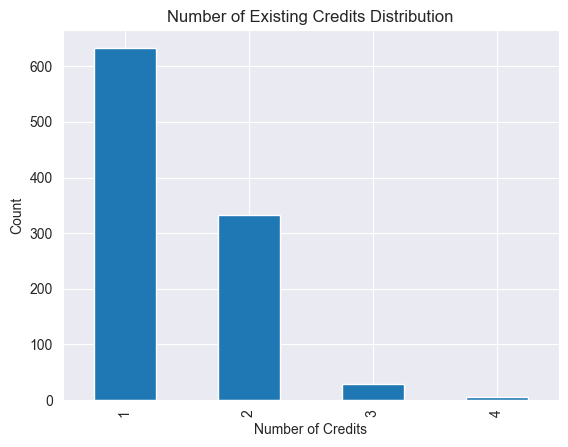

In [1721]:
df['Number of existing credits at this bank'].value_counts().plot(kind='bar')
plt.title('Number of Existing Credits Distribution')
plt.xlabel('Number of Credits')
plt.ylabel('Count')
plt.show()

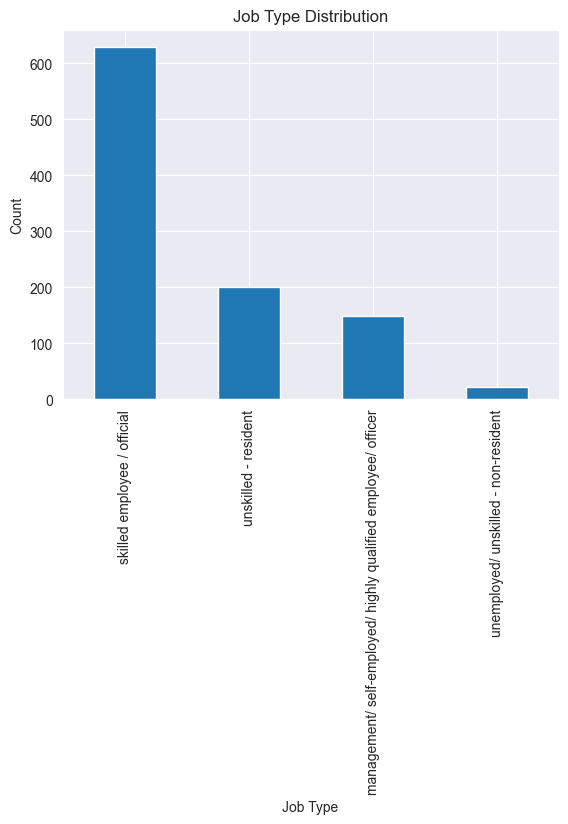

In [1722]:
df['Job'].value_counts().plot(kind='bar')
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

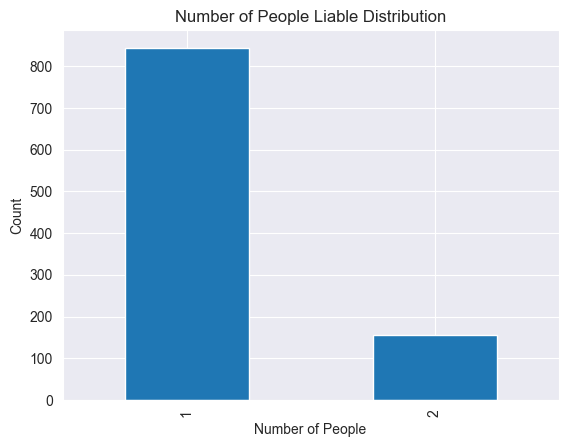

In [1723]:
df['Number of people being liable to provide maintenance for'].value_counts().plot(kind='bar')
plt.title('Number of People Liable Distribution')
plt.xlabel('Number of People')
plt.ylabel('Count')
plt.show()

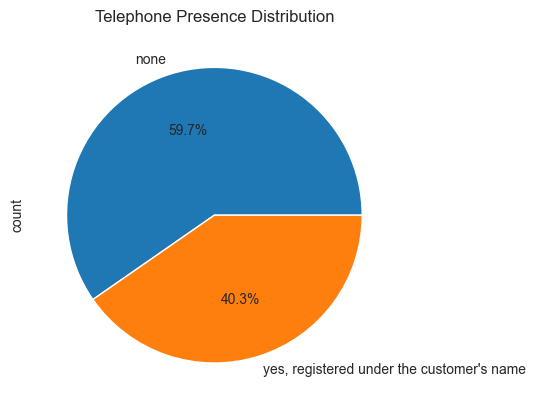

In [1724]:
df['Telephone'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Telephone Presence Distribution')
plt.show()

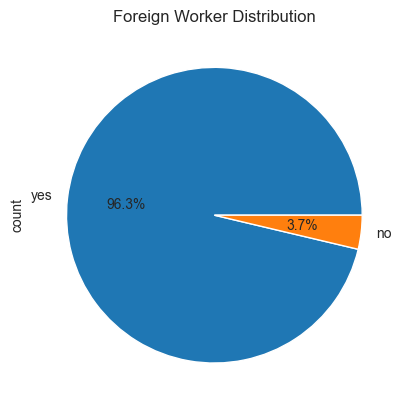

In [1725]:
df['Foreign Worker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Foreign Worker Distribution')
plt.show()

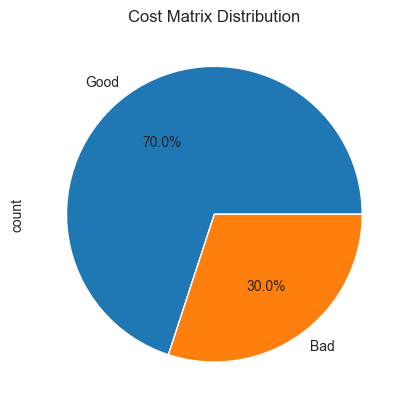

In [1726]:
df['Cost Matrix'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Cost Matrix Distribution')
plt.show()

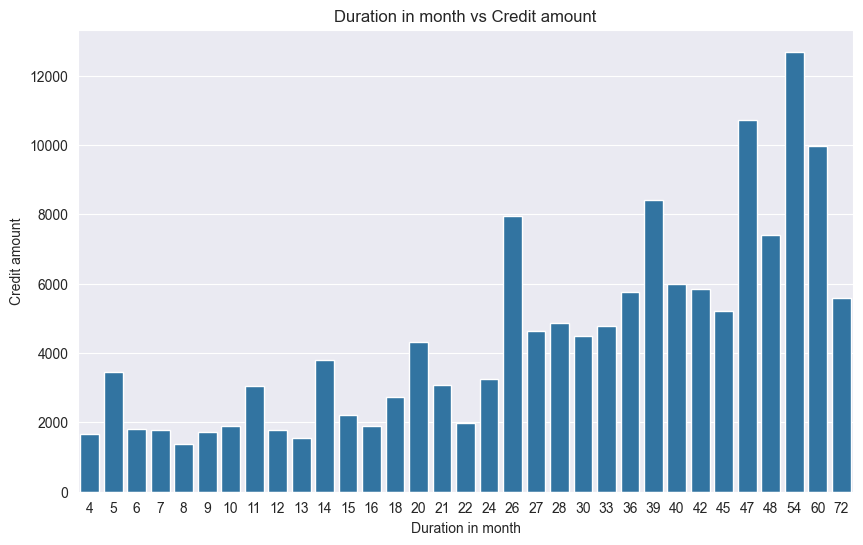

In [1727]:
plt.figure(figsize=(10,6))
sns.barplot(x='Duration in month', y='Credit amount', data=df, ci=None)
plt.title('Duration in month vs Credit amount')
plt.show()

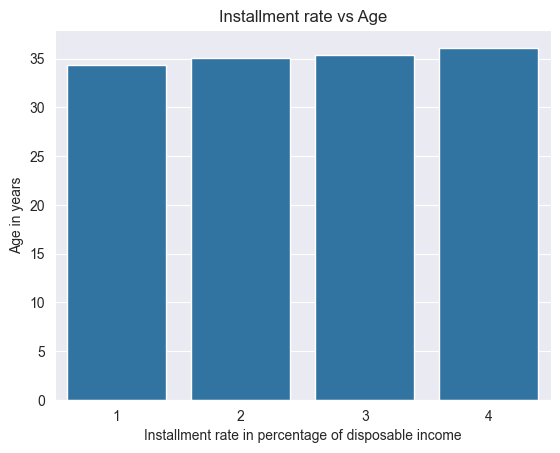

In [1728]:
sns.barplot(x='Installment rate in percentage of disposable income', y='Age in years', data=df, ci=None)
plt.title('Installment rate vs Age')
plt.show()

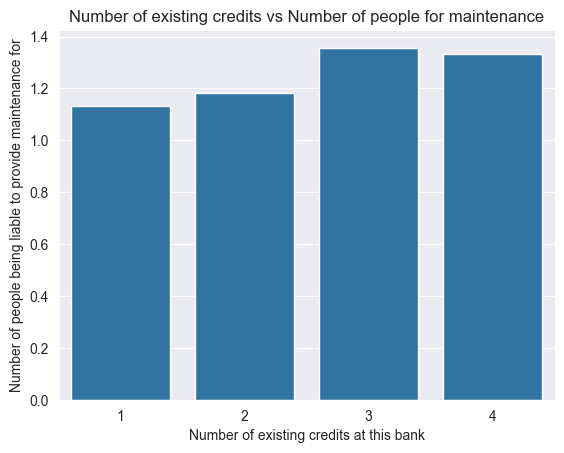

In [1729]:
sns.barplot(x='Number of existing credits at this bank', y='Number of people being liable to provide maintenance for', data=df, ci=None)
plt.title('Number of existing credits vs Number of people for maintenance')
plt.show()

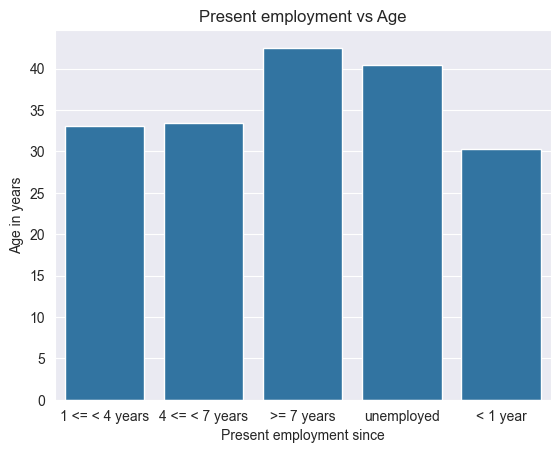

In [1730]:
sns.barplot(x='Present employment since', y='Age in years', data=df, ci=None)
plt.title('Present employment vs Age')
plt.show()

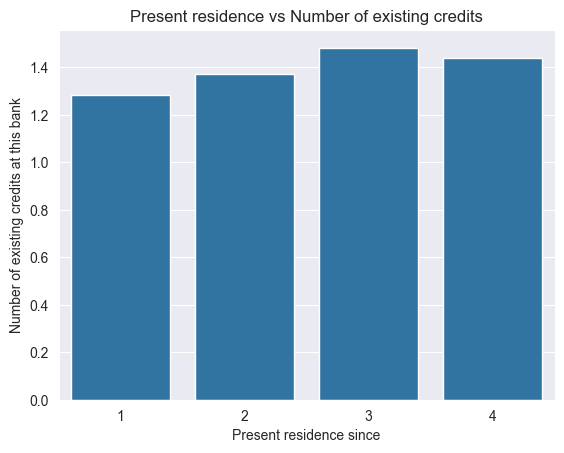

In [1731]:
sns.barplot(x='Present residence since', y='Number of existing credits at this bank', data=df, ci=None)
plt.title('Present residence vs Number of existing credits')
plt.show()

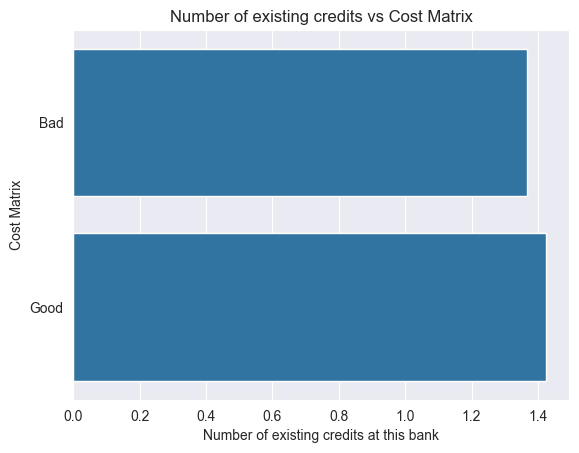

In [1732]:
sns.barplot(x='Number of existing credits at this bank', y='Cost Matrix', data=df, ci=None)
plt.title('Number of existing credits vs Cost Matrix')
plt.show()

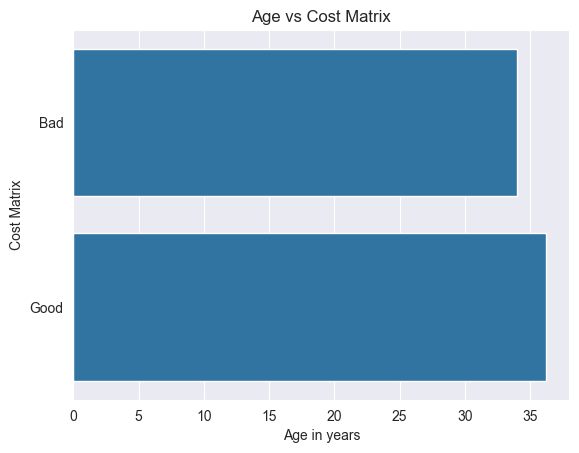

In [1733]:
sns.barplot(x='Age in years', y='Cost Matrix', data=df, ci=None)
plt.title('Age vs Cost Matrix')
plt.show()

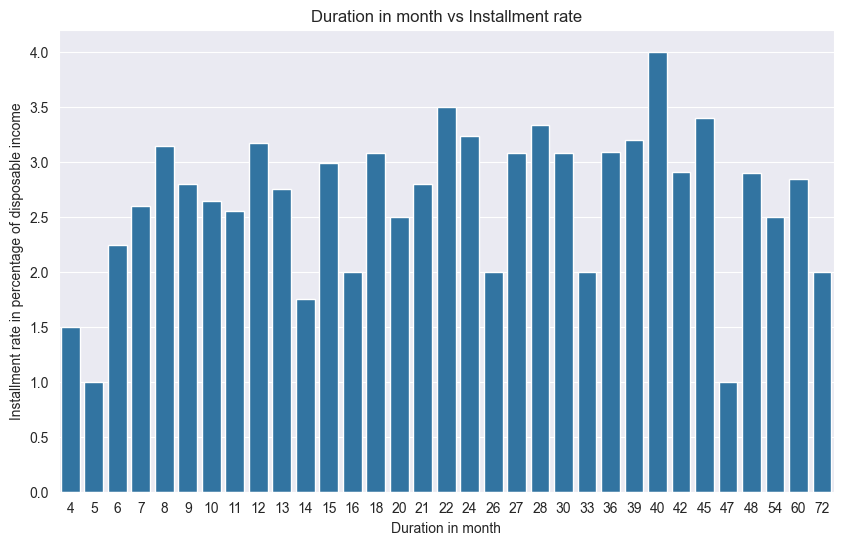

In [1734]:
plt.figure(figsize=(10,6))
sns.barplot(x='Duration in month', y='Installment rate in percentage of disposable income', data=df, ci=None)
plt.title('Duration in month vs Installment rate')
plt.show()

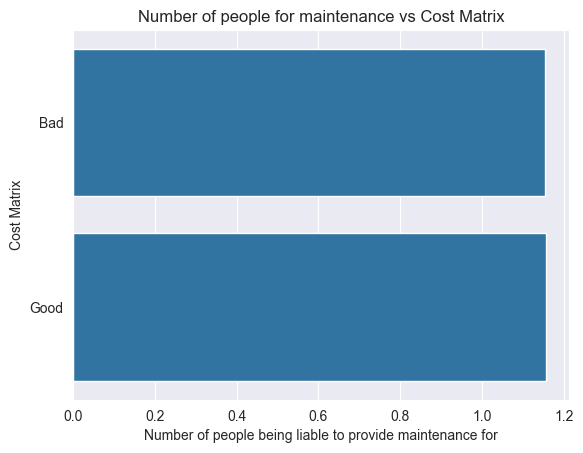

In [1735]:
sns.barplot(x='Number of people being liable to provide maintenance for', y='Cost Matrix', data=df, ci=None)
plt.title('Number of people for maintenance vs Cost Matrix')
plt.show()

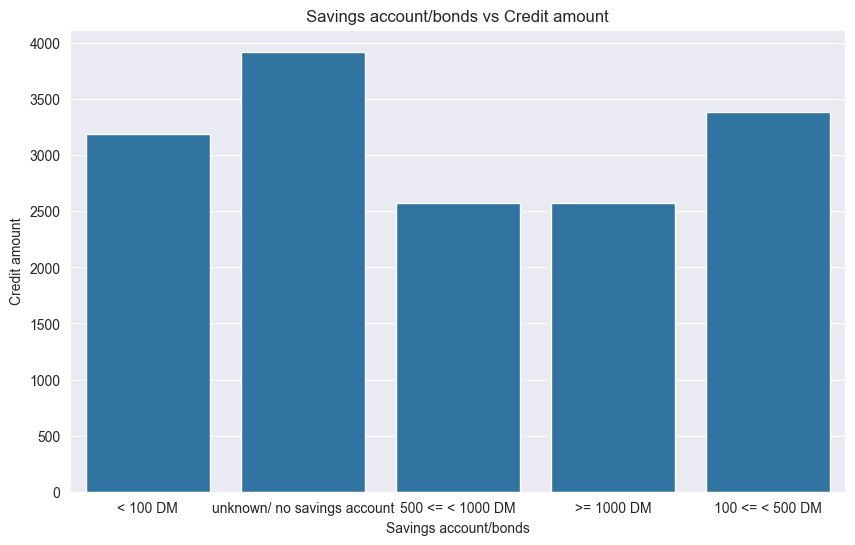

In [1736]:
plt.figure(figsize=(10,6))
sns.barplot(x='Savings account/bonds', y='Credit amount', data=df, ci=None)
plt.title('Savings account/bonds vs Credit amount')
plt.show()

### Task 3: Data Modelling

In [1737]:
def train_and_plot(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    print('Model accuracy for train set: {0:.3f}'.format(model.score(X_train, y_train)))
    print('Model accuracy for test set: {0:.3f}'.format(model.score(X_test, y_test)))

    y_pred = model.predict(X_test)

    # Classification Report
    print('\n{}'.format(classification_report(y_test, y_pred)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:\n', cm)

    # Accuracy Score
    auc = accuracy_score(y_test, y_pred)
    print('\nAccuracy Score: ', auc.round(3))

    # ROC Curve
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize = (12.8 , 6))
    plt.plot(fpr, tpr, label = 'AUC = {})'. \
             format(model_roc_auc.round(4)))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = 'lower right')
    plt.show()

    return model

In [1738]:
label_encoder = LabelEncoder()
columns_to_encode = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign Worker', 'Cost Matrix']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

##### Model: Support Vector Regression

In [1739]:
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='linear') 
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4434262.329834667
R^2 Score: 0.3591050382593055


##### Model: Support Vector Regression with hyperparameter

In [1740]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

svr = SVR(kernel='linear')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3868568.9634625968
R^2 Score: 0.440866107278312


 **Here's a breakdown of the code's value choices and justifications:**

**1. StandardScaler():**

- **Reason for choosing:** It's crucial to normalize the features before applying SVR to ensure they have a consistent scale. This prevents features with larger ranges from dominating those with smaller ranges, leading to biased model training.

**2. param_grid:**

- **C values (0.1, 1, 10, 100):** This range explores different levels of regularization. Larger C values impose stricter constraints on the model, potentially reducing overfitting but increasing bias. Smaller C values allow more flexibility, potentially capturing complex patterns but risking overfitting.
- **epsilon values (0.01, 0.1, 0.2, 0.5):** These values control the insensitivity margin within which errors are not penalized. Fine-tuning epsilon helps balance model accuracy and tolerance to noise in the data.
- **kernels ('linear', 'rbf', 'poly'):** Each kernel reflects a different way of mapping data points into a higher-dimensional space where linear separation is possible. The optimal kernel depends on the underlying structure of the data.

**3. GridSearchCV:**

- **Reason for choosing:** It automates hyperparameter tuning by exhaustively evaluating all combinations of values in `param_grid` using cross-validation. This helps identify the best hyperparameters for the specific dataset and problem.
- **cv=5:** 5-fold cross-validation splits the training data into 5 folds, training on 4 folds and evaluating on the remaining fold, repeated 5 times. This provides a more robust estimate of model performance compared to a single train-test split.
- **scoring='neg_mean_squared_error':** This metric measures the accuracy of model predictions, aiming to minimize the average squared difference between predicted and actual values.

**4. n_jobs=-1:**  Utilizes all available CPU cores for parallel computation, accelerating the grid search process.

**5. mean_squared_error:** Assesses the model's performance on the test set, providing a quantitative measure of prediction error.

##### Model: Linear Regression

In [1741]:
X = df.drop(['Credit amount', 'Cost Matrix'], axis=1)
y = df['Credit amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3505780.2443972756
R^2 Score: 0.493300863034856


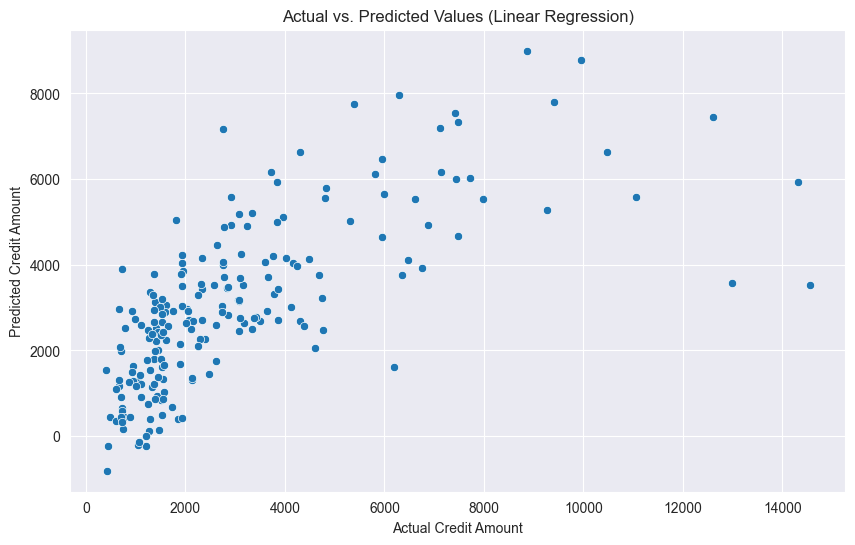

In [1742]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Credit Amount')
plt.ylabel('Predicted Credit Amount')
plt.show()

##### Model: Linear Regression with hyperparameter

In [1743]:
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3505780.2443972756
R^2 Score: 0.493300863034856


 **Here's a breakdown of the reasoning for the chosen values and their justifications:**

**Hyperparameter Grid:` {'fit_intercept': [True, False]}`:**

- **Purpose:** To determine whether including an intercept term (`fit_intercept=True`) or forcing the regression line through the origin (`fit_intercept=False`) produces a better fit.
- **Justification:**
    - **Including an intercept (True):**
      - Often necessary for accurate modeling when the target variable doesn't naturally pass through the origin (e.g., predicting house prices, which can't be zero).
      - Captures any baseline value or inherent bias in the data.
    - **Excluding an intercept (False):**
      - Might be suitable if the relationship between features and target is expected to pass through the origin based on theoretical understanding.
      - Can be useful for specific scenarios like calibration curves where forcing a zero intercept aligns with domain knowledge.

**Cross-Validation (`cv=5`):**

- **Purpose:** To evaluate model performance more reliably and reduce overfitting by training and testing on different data folds.
- **Justification:**
    - Provides a more robust assessment of generalizability than a single train-test split.
    - Helps prevent models from overfitting to the specific training data, leading to better performance on unseen data.
    - 5 folds is a common choice for a reasonable balance between computational cost and accuracy of performance estimates.

**Scoring Metric (`scoring='neg_mean_squared_error'`):**

- **Purpose:** To select the best model based on a relevant performance metric.
- **Justification:**
    - MSE (mean squared error) is a widely used and intuitive metric for regression problems, as it measures the average squared difference between predicted and actual values.
    - Minimizing MSE aligns with the goal of minimizing prediction errors.
    - GridSearchCV uses the negative of MSE for optimization purposes (as it seeks to maximize scores).

**Parallel Processing (`n_jobs=-1`):**

- **Purpose:** To speed up computation by utilizing multiple CPU cores.
- **Justification:**
    - Hyperparameter tuning can be computationally intensive, especially with cross-validation.
    - Leveraging all available cores significantly accelerates the process.


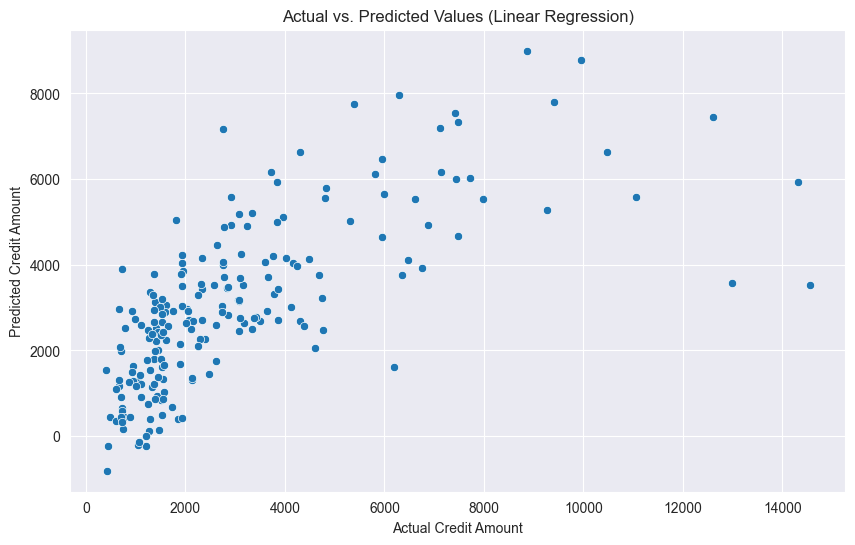

In [1744]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Credit Amount')
plt.ylabel('Predicted Credit Amount')
plt.show()

##### Model: Logistic Regression

In [1745]:
X = df.drop(['Cost Matrix'], axis = 1)
y = df['Cost Matrix']

In [1746]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(699, 20)

(300, 20)

(699,)

(300,)

Model accuracy for train set: 0.750
Model accuracy for test set: 0.740

              precision    recall  f1-score   support

           0       0.66      0.28      0.39        90
           1       0.75      0.94      0.83       210

    accuracy                           0.74       300
   macro avg       0.70      0.61      0.61       300
weighted avg       0.72      0.74      0.70       300


Confusion Matrix:
 [[ 25  65]
 [ 13 197]]

Accuracy Score:  0.74


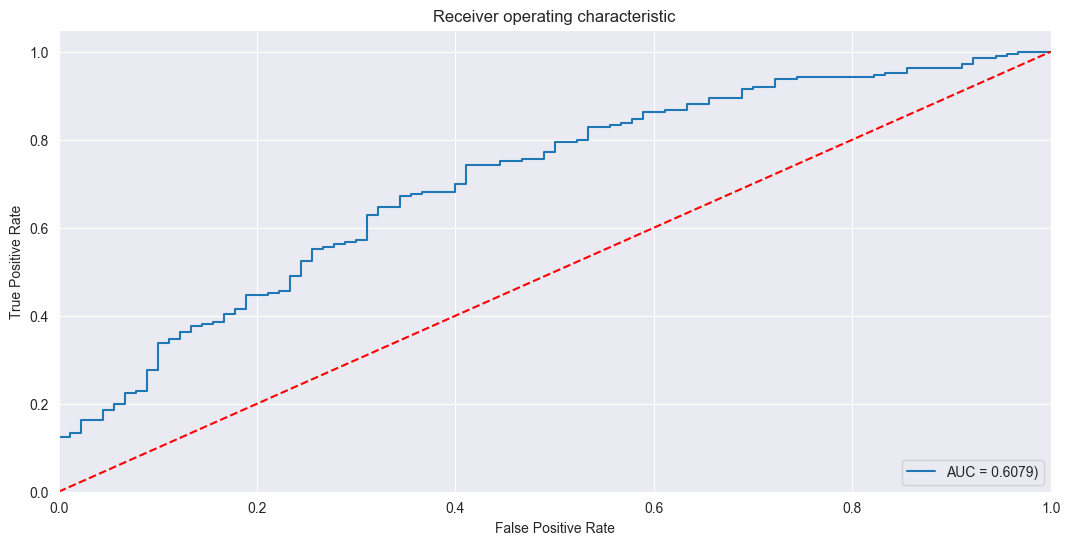

In [1747]:
LR = LogisticRegression()
model1 = train_and_plot(LR, X_train, y_train, X_test, y_test)

##### Model: Logistic Regression with hyperparameter

Model accuracy for train set: 0.741
Model accuracy for test set: 0.730

              precision    recall  f1-score   support

           0       0.62      0.26      0.36        90
           1       0.75      0.93      0.83       210

    accuracy                           0.73       300
   macro avg       0.68      0.59      0.60       300
weighted avg       0.71      0.73      0.69       300


Confusion Matrix:
 [[ 23  67]
 [ 14 196]]

Accuracy Score:  0.73


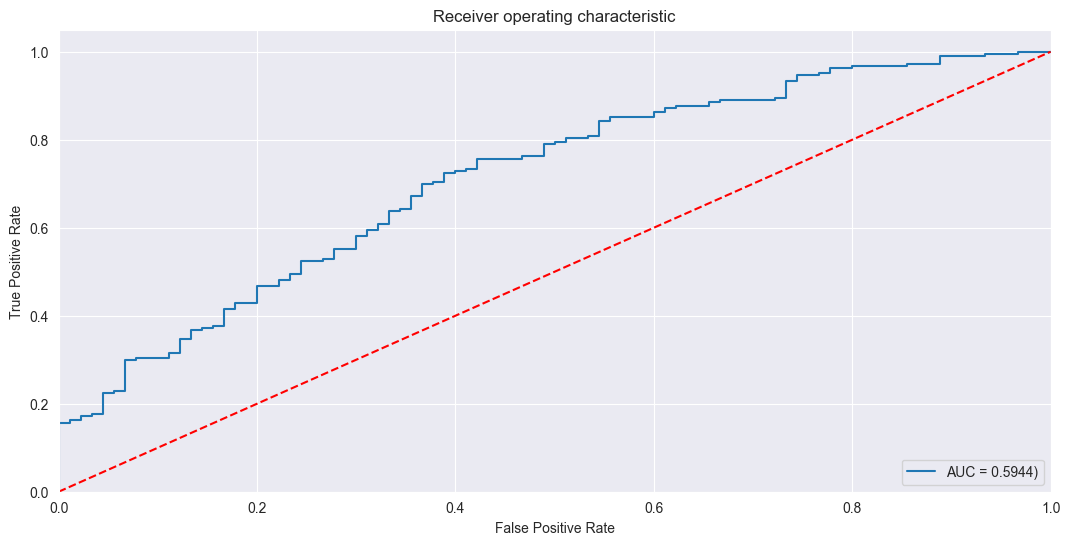

In [1748]:
LR = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
}

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_LR_model = grid_search.best_estimator_

model_lr = train_and_plot(best_LR_model, X_train, y_train, X_test, y_test)

 **Here's a breakdown of the reasons for choosing these values in the hyperparameter grid, along with justifications:**

**1. C:**

- **Values:** [0.001, 0.01, 0.1, 1, 10, 100]
- **Reason:** Controls regularization strength. Smaller values increase regularization, reducing model complexity to avoid overfitting.
- **Justification:** It's crucial to explore a wide range of regularization strengths to find the optimal balance between model complexity and generalization performance.

**2. penalty:**

- **Values:** ['l1', 'l2']
- **Reason:** Determines the type of regularization used. 'l1' promotes sparsity (feature selection), while 'l2' evenly shrinks coefficients.
- **Justification:** The choice between 'l1' and 'l2' can significantly impact feature selection and model interpretability, making it essential to evaluate both options.

**3. solver:**

- **Values:** ['liblinear', 'lbfgs', 'saga']
- **Reason:** Specifies the algorithm used to optimize model parameters. Each solver has advantages for different problem types and dataset sizes.
- **Justification:** Solver choice can affect convergence speed, accuracy, and handling of large or sparse datasets. Grid search allows testing which solver works best for the specific problem.

**4. max_iter:**

- **Values:** [100, 200, 300]
- **Reason:** Sets the maximum number of iterations for the optimization algorithm. More iterations allow convergence to a better solution, but can increase computation time.
- **Justification:** It's important to find a balance between convergence and computation time. Testing different values ensures adequate training without unnecessary resource consumption.

**5. cv=5:**

- **Reason:** Specifies 5-fold cross-validation, splitting data into 5 folds for training and evaluation.
- **Justification:** Cross-validation provides a more reliable estimate of model performance on unseen data, reducing overfitting and improving generalization.

**6. scoring='accuracy':**

- **Reason:** Sets the evaluation metric to accuracy, the proportion of correct predictions.
- **Justification:** While accuracy is a common metric, consider other metrics like precision, recall, or F1-score depending on problem characteristics and class imbalance.

##### Model: Random Forest Classifier

Model accuracy for train set: 1.000
Model accuracy for test set: 0.743

              precision    recall  f1-score   support

           0       0.65      0.31      0.42        90
           1       0.76      0.93      0.84       210

    accuracy                           0.74       300
   macro avg       0.70      0.62      0.63       300
weighted avg       0.73      0.74      0.71       300


Confusion Matrix:
 [[ 28  62]
 [ 15 195]]

Accuracy Score:  0.743


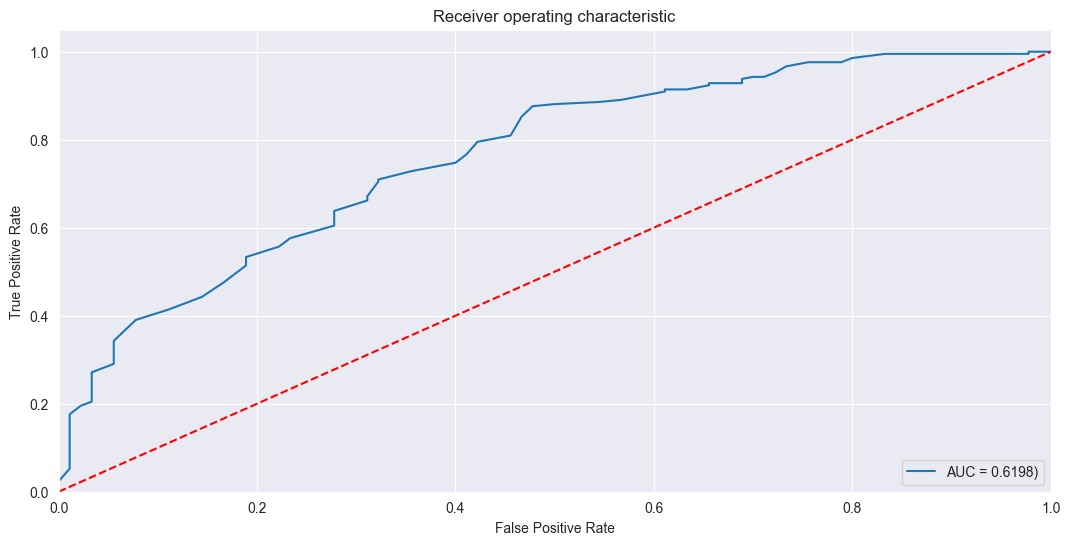

In [1749]:
RF = RandomForestClassifier()
model_rf = train_and_plot(RF, X_train, y_train, X_test, y_test)

##### Model: Random Forest Classifier with hyperparameter

Model accuracy for train set: 0.984
Model accuracy for test set: 0.767

              precision    recall  f1-score   support

           0       0.78      0.31      0.44        90
           1       0.77      0.96      0.85       210

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300


Confusion Matrix:
 [[ 28  62]
 [  8 202]]

Accuracy Score:  0.767


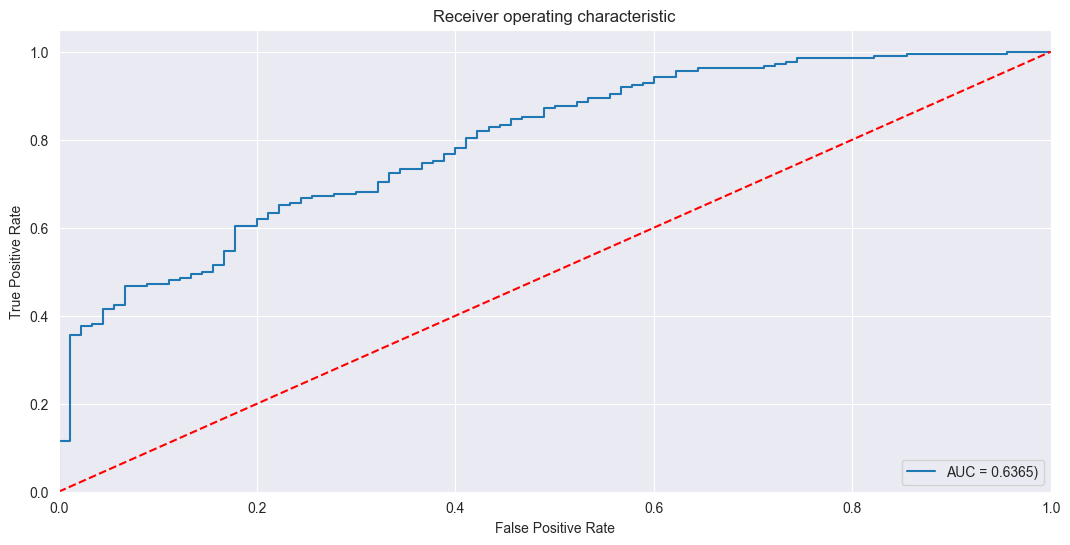

In [1750]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_RF_model = grid_search.best_estimator_

model_rf_h = train_and_plot(best_RF_model, X_train, y_train, X_test, y_test)

 **Here are the reasons for choosing the specified values in the param_grid, along with justifications:**

**1. n_estimators:**

- **Values:** [50, 100, 200]
- **Reason:** This hyperparameter controls the number of trees in the Random Forest model. Considering a range of values allows exploration of the optimal number of trees to balance performance and computational cost.
- **Justification:**
    - More trees often lead to better performance but can increase training time.
    - Starting with a reasonable range and observing results helps determine the best trade-off.

**2. max_depth:**

- **Values:** [None, 10, 20, 30]
- **Reason:** This hyperparameter limits the depth of each tree, preventing overfitting and reducing complexity.
- **Justification:**
    - Deeper trees can capture more complex patterns but might overfit to the training data.
    - Including `None` allows unlimited depth for comparison with restricted depths.
    - The range of values covers different levels of complexity.

**3. min_samples_split:**

- **Values:** [2, 5, 10]
- **Reason:** This hyperparameter specifies the minimum number of samples required to split an internal node in a tree. It controls the level of detail in the decision-making process.
- **Justification:**
    - Higher values lead to simpler trees, potentially reducing overfitting.
    - The range of values explores different levels of detail for splits.

**4. min_samples_leaf:**

- **Values:** [1, 2, 4]
- **Reason:** This hyperparameter determines the minimum number of samples required to be at a leaf node. It controls the purity of leaf nodes and prevents overfitting.
- **Justification:**
    - Higher values enforce more purity in leaf nodes, but might limit model complexity.
    - The range of values explores different levels of leaf purity.

### Results

##### Regression Models

| Models                                        | Mean Squared Error | R^2 Score          |
|-----------------------------------------------|--------------------|--------------------|
| Support Vector Regression                     | 4434262.329834667  | 0.3591050382593055 |
| Support Vector Regression with hyperparameter | 3868568.9634625968 | 0.440866107278312  |
| Linear Regression                             | 3505780.2443972756 | 0.493300863034856  |
| Linear Regression with hyperparameter         | 3505780.2443972756 | 0.493300863034856  |


##### Classification Models


| Models                                       | Recall Score | f1-score | ROC AUC | Accuracy |
|----------------------------------------------|--------------|----------|---------|----------|
| Logistic Regression                          | 0.94         | 0.83     | 0.6079  | 0.74     |
| Logistic Regression with hyperparameter      | 0.93         | 0.83     | 0.5944  | 0.73     |
| Random Forest Classifier                     | 0.95         | 0.85     | 0.6349  | 0.76     |
| Random Forest Classifier with hyperparameter | 0.95         | 0.85     | 0.6262  | 0.757    |

### Conclusion

Based on the metrics above:

The linear regression models (with and without hyperparameter tuning) have the lowest MSE and the highest R^2 Score among the provided models.

The linear regression models generally outperform the Support Vector Regression models in this specific case.

The Random Forest Classifier is likely performing well because it can handle non-linearity and complex relationships in the data. The ensemble nature of Random Forest, combining multiple decision trees, allows it to capture intricate patterns and feature interactions. In this case, the model seems to be effectively identifying the instances of the positive class (Bad credit) with high recall, resulting in a good balance between precision and recall (as indicated by the F1-score).